In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
from matplotlib import pyplot as plt

### NDARRAY: Multidimensional Array Object


In [ ]:
# generate random data filling 2 rows and three columns
data = np.random.randn(2, 3)
data

In [ ]:
# multiply all the elements in the array by 100
data * 100

In [ ]:
# get the shape of the array
data.shape

In [ ]:
# get the type of data in the array
data.dtype

## Creating ndarray

In [ ]:
# Creating ndarrays
data1 = [1, 2, 3, 4, 5.1, 6.2]
arr1 = np.array(data1)

In [ ]:
arr1

In [ ]:
data2 = ['c', 'b', 'a']
arr2 = np.array(data2)

In [ ]:
arr2

In [ ]:
data3 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr3 = np.array(data3)

In [ ]:
print(arr3.shape)
print(arr3.dtype)
arr3

In [ ]:
# get the dimension of the array
print(arr1.ndim)
print(arr3.ndim)

In [ ]:
# create arrays filled with zeros, given a specific length or shape 

# an array of 10 zeroes in length (10,)
a = np.zeros(10)

# an array of a given shape (3, 4), containing zeroes
b = np.zeros((3, 4))

print('a', a)
print()
print('b' , b)

In [ ]:
# creating an array of ones
a = np.ones(10)
b = np.ones((3, 4))

print('a', a)
print()
print('b', b)
b.ndim

In [ ]:
# using empty to intialise an array
np.empty((3, 4,))

### NOTE
using empty method to intiialise an ndarray is almost similar to using random, except that it could fill it with garbage values

## Arange 

Creates an ndarray from start to stop-1; just like the python range function

In [ ]:
# create an array of elements starting from 10 to 100, in steps of 2
np.arange(10, 101, 2,)

## Linspace 

works similarly as *arange* but the third specified parameter indicates how many element should be returned between the *start* and *stop* (inclusive)

> The elements returned are evenly spaced

In [ ]:
np.linspace(1, 100, 10)

In [ ]:
np.asarray(np.arange(10))

## ones_like and zeros_like

the *ones_like*  and *zeros_like* method takes an ndarray, and produce the same ndarray with its element change to one (ones_like) or zero (zeros_like)

In [ ]:
data = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]

# create an array from the data 
arr1 = np.array(data)

# using the asarray method. note that arr1 == arr2
arr2 = np.asarray(data)
print('arr1', arr1)
print("")
print('arr2', arr2)

# change the element of arr1 to one
a = np.ones_like(arr1)
print('arr1 ones_like: ', a)

# change the element of arr2 to zeros
b = np.zeros_like(arr2)
print('arr1 zeros_like: ', b)

# instead of converting to an ndarray before passing to the method,
# we pass the list directly
np.ones_like(data)

## full and full_like method

#### full
Takes the shape and an element that will be used to fill the ndarray of that same shape

#### full_like
takes another array and fill it with the specified value; note the same data type will be used as the passed array

In [ ]:
 
from numpy import unicode_


a = np.full((2, 3), [2, 4, 5], )

a

In [ ]:
np.full_like(a, 100)

In [ ]:
np.full_like(a, [30, 90, 270])

## Type Casting

The *astype* method can be used to change (if possible) the underlying type of an ndarray

In [ ]:
# create a 3 x 3 ndarray of type int32 and change the underlying type to unicode
np.full((3, 3), 4, dtype='int32').astype(np.unicode_)

In [ ]:
# create an random 3 x 3 ndarray of float32

arr1 = np.random.random((3, 3)).astype('float32')
print(arr1.dtype)
print('arr1: ', arr1)

# cast the result to an int type
arr1.astype('int32') 

---


# Arithmetic with ndarrays

Arithmetic operations are performed on ndarrays of equal size without writing a for loop. This is known as **batch processing** or **vectorization**

The arithmetic operation is applied to each element of the array OR element-wise operation IF two or more arrays are supplied

In [ ]:
# array
# arange
# ones, ones_like
# zeros, zeros_like
# linspace
# astype
# full, full_like

In [ ]:
arr1 = np.asarray([[1, 2, 3], [4, 5, 6]], dtype='float64')
arr1

In [ ]:
arr2 = np.asarray([[1, 0, 3], [-5, 4, 1]])
arr2

In [ ]:
(1/ arr2) ** 3


# Broadcasting

In vectorization, the arrays must have the same size (shape). In broadcasting however, the arrays can have different size.


Broadcasting Operations

- multiplication of an ndarray with a scalar value


---
---

# Slicing and Indexing an Ndarray



In [ ]:
# create an ndarray with element 1 - 10

arr = np.arange(11)
arr

In [ ]:
# select the 5th element
print(arr[4])

# select the 2nd, 4th, and 6th element
print(arr[1:7:2])

# select the 4th to 9th element
print(arr[3:10])

In [ ]:
# replacing through broadcasting
arr

In [ ]:
arr[4:9] = 12
arr

> ### Any modification on slices will be reflected on the source array, because slices are views on the source array

The result of slicing an ndarray is a view on the source array and not a copy of data from the source array

In [ ]:
arr

In [ ]:
# create a slice of 4th to 9th element
arr_slice = arr[4:10]
print('slice', arr_slice)

# modify all the element in the slice to 101
arr_slice[:] = 101
print('modified slice: ', arr_slice)

# we notice immediately that the source ndarray is modified simultaneously
print('source ndarray: ', arr)

print("")
print("")
# copy a slice which upon modification will not reflect on the source
arr_slice_copied = arr[1:6].copy()
print('slice copied', arr_slice_copied)

# modify the copied slice
arr_slice_copied[:] = 230
print('modified copied slice', arr_slice_copied)

# check the source that it is not modified
print('source: ', arr)

# Slicing and Indexing in Multidimensional Arrays

In >= 2 ndarrays, when indexed, output a lower dimension array

In [ ]:
arr = np.asarray([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print('source ndarray: '), 
print(arr)

In [ ]:
# create a slice from the 
arr

In [ ]:
arr[0:3,2]

## Indexing using a comma seperated value for >= 2 ndarray

The order of indexing is always from *Outside* --> *Inside*

In [ ]:
arr[1] = [4, 5, 6]
arr

In [ ]:
# select all the element in the third column
arr[:, 2]

In [ ]:
# working with three dimensional data

arr = np.asarray([ [[1, 2, 3, 4], [4, 5, 6, 40], [10, 10, 10, 10]] , [[2, 2, 2, 2], [7, 8, 9, 160], [10, 11, 12, 524]] ])

print('dimension: ', arr.ndim)
print('shape: ', arr.shape)

print("")
arr

In [ ]:
# select all the element in the 
arr[:, 0, :3]

---

# Boolean Indexing



In [ ]:
# names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7, 3, 4)
data

In [ ]:
# select only columns for which the first element of its rows is less than 0

# first we create the truthy value
cond = data[:, 0, 0] < 0

# select columns, where the first elements of the innermost rows is less than 0
data[cond, :, 0][:, 0]


In [ ]:
# select only inner row elements less than 0, for each element of the 3d-array 

# Note: each element of the (7, 3, 4) array is a 2d array of (3, 4) rows and column

# So, we want to select each element of the (7, 3, 4) array ==> this will  result in seven; 7 different (3, 4) arrays,

# Then we select the first rows of the (3, 4) resulting arrays ==> this will result in seven; 7 different, (1, 4) array.

# then we check that the inner elements of each resulting rows has a value less than 0

cond2 = data[:, 0] < 0
cond2

In [ ]:
# this method here is the same as the one below
for i, cond in enumerate(cond2):
  print(data[:, 0, cond][i])
  print()
  
# second method
data[:, 0][cond2]


## !NOTE

When applying a conditional indexing, the dimension of the resulting conditional must match the slice, it is going to be applied to

--- 

In [ ]:
arr = np.empty((4, 4))
arr

In [ ]:
arr[[0, 1, 2, 3], [0, 1, 2, 3]]

In [ ]:
arr = np.arange(45).reshape(3, 3, 5)
arr

# Fancy Indexing

This allows the selection of the rows of an ndarray, in a specific order, by passing a list with the index of the rows to be selected.

> However this indexing does not apply *in the same manner* to the next inner indexing

If mulltiple index are passed in, then it would select a one-dimensional array of elements corresponding to each tuple of indices

In [ ]:
# one can select the first and last element of the (3, 3, 5) ndarray ==> two (2, 3, 5) ndarray

# note the tuple of indices are: (0, 1, 4), (2, 0, 3) ==> 
# 	select the first(0) outer row, second(1) inner row, and 5th(4)  element
# 	select the third(2) outer row, first(0) inner row, and 4th(3)  element
# 	select the second(1) outer row, third(2) inner row, and 2nd(1)  element
# 	
arr[[0, 2, 1], [1, 0, 2], [4, 3, 1]]

In [ ]:
# with the 2d-array
arr = np.arange(20).reshape(4, 5)
arr

In [ ]:
# select the first(0), and third(2) outer row
# then select their second(1) and fifth(4) element respectively.
arr[[0,2, 1], [1]]

> ### In general when using fancy indexing, the multiple array index passed must either have the same length OR the second index, have a single element; in which case, the array is expanded, to the same length as its first array index with its containing element

> ### The length of the first array index, determines the length of the other array indices

> ### If the array is k-dimensional, then a maximum of [k] multiple indices can be passed in. Also, the kth array index will index into individual element of the preceeding [k-1] resulting array

In [ ]:
# 4d-array

arr = np.arange(180).reshape(3, 3, 4, 5)
arr

In [ ]:
# 4 multiple array indices are needed to select an element in the array

arr[[0, 1], [1, 2], [1, 3], [[3, 4]]]

---

# Transposing Arrays and Swapping Axes

This returns a view of the underlying data without copying the source array

In [ ]:
# create a 3, 5 array
arr = np.arange(15).reshape((3, 5))

arr

In [ ]:
# transpose it to a (5, 3) array

arr_T = arr.T # or arr.transpose()

arr_T

In [ ]:
# we modify the transposed array and confirm that the source array is also modified
# thus indicating that the transposed array is a view

arr_T[2] = 1000

print('modified arr_T')
print(arr_T)

print("source array:")
print(arr)

# Matrix multiplication and the Transpose of an ndarray

> To mutiply two matrix, the num of columns of the first must match the num of rows of the second. Hence to multiply a non-square matrix (m x n; where m!=n) by itself, then we have to multiply it with a transpose of itself

Note that this is otherwise 
> [!NOTE]
> Multiplication of two matrix, not element wise, is done using the [dot] method



In [ ]:
arr = np.random.randn(10, 5)
arr

In [ ]:
arr_mul = np.dot(arr.T, arr)
arr_mul

### Transpose and Higher Dimensional Array

This is similar to re-ordering the axes of the higher dimensional array

In [ ]:
arr = np.arange(16).reshape((2, 2, 4))

arr

In [ ]:
# make the second(1) axis first, first(0) axis second, and the third axis unchannged 
arr.transpose((1, 0, 2))

---
# Array Functions

A universal array function (ufunc), is any function that performs element-wise operations on the ndarrays, and returns a scalar or array of scalar values as its result

- Unary Unfunc
	- sqrt, exp

- binary ufuncs
	- add,

- n-aryy ufuncs

In [ ]:
arr1d = np.arange(4, 20)
arr1d

In [ ]:
# square root of element
np.sqrt(arr1d)

In [ ]:
arr2d = np.arange(16).reshape((4, 4))
arr2d

In [ ]:
# square of the 2d elements 

np.sqrt(arr2d)

In [ ]:
# as exponential of e
print("e^(each array element): ")
np.exp(arr2d)


In [ ]:
arr2d

In [ ]:
# broadcasting
arr2d + 2

In [ ]:
# vectorization
arr2d + arr2d

In [ ]:
np.add(arr2d, arr2d)

In [ ]:
print(arr1d)
print()
print(arr2d)

In [ ]:
arr1d_rshp = arr1d.reshape((4, 4))
arr1d_rshp

In [ ]:
np.maximum(arr2d.T, arr1d_rshp)

In [ ]:
# modf array
remainder, whole = np.modf(arr2d, arr1d_rshp.astype('float64'))

In [ ]:
remainder

In [ ]:
whole

## !NOTE

> ufunc, can accept an optional argument that tells them where to  put the result of the computation, but the optional argument array must;

-  be the same order as the first argument, 
-  have the same type as the result of the computation.

In [ ]:
# create two array of the same size
arr1 = np.arange(1, 13)
arr2 = np.arange(30 ,42).astype('float64')
print(arr1.size == arr2.size)

In [ ]:
arr1

In [ ]:
arr2

In [ ]:
# take the sqrt of arr1 and store the result in arr2

# because arr2 is not the same type as the result of taking the sqrt on arr1
# we must change its type, so that it can store the result of the computation (float64)

# the previous statement isn't totally true. I used the astype for the conversion, and it turns out that the method returns a copy and doesn't modify the array in-place
# so i had to add the type from its initialisation for this to work
np.sqrt(arr1, arr2)

In [ ]:
# check the elements of arr2 and see that it has been modified
arr2

In [ ]:
# array remains the same
arr1


In [ ]:
# pass arr1 as the second argument

# notice how we had to change the type of the array in memory
arr1 = arr1.astype('float64')
np.sqrt(arr1, arr1)

In [ ]:
arr1

In [ ]:
arr = np.arange(20, 26)
arr

In [ ]:
#3 return the logarithm to base e, by adding one to all the element before performing the logarithmic computation
np.log1p(arr)

# Array-Oriented Programming

In this scenario, the object we interact with; manipulate , process, and store are the numpy arrays. The advantage of using numpy arrays here rather than Python's native list is due to n batch processing (vectorization or broadcasting) which allows us to avoid writing explicit for loops.

Aside not writing for loops, the performance of vectorization greatly exceed that of for loops.

In [ ]:
arr = np.arange(-1, 1, 0.001)
arr

#### Meshgrid Function

This takes two 1d-array and produce a 2d-array vector tuples (or matrix) of all the pairs in the array.

the size of the resulting matrix = len(first_array) * len(second_array)

In [ ]:
arr1 = np.arange(1, 10)
arr2 = np.arange(10, 13)

x1, y1 = np.meshgrid(arr1, arr2)

In [ ]:
x1

In [ ]:
y1

In [ ]:
z1 = np.sqrt(x1 **2 + y1 **2)

In [ ]:
x2, y2 = np.meshgrid(arr, arr)

In [ ]:
z2 = np.sqrt(x2 ** 2 + y2 **2)

In [ ]:
plt.imshow(z1, cmap=plt.cm.gray)
plt.colorbar()

In [ ]:
plt.imshow(z2, cmap=plt.colormaps['Reds_r'])
plt.colorbar()

## Where: Conditional Logic as Array Expressions

The where method is similar to the ternary expression:
	x if condition else y
```python
np.where(cond, first_array, second_array)

> - Note:
> - the second and third argument need not be arrays, as they can be scalar values
> - the output of the result of the computation will have the same shape as the conditonal variable 
```
That is, choose x if condtion is true, otherwise choose y;

---
My first line of reasoning is that all the argument to the *where* method must have the same dimension??

Turns out this is false; what matters is **the *size* of the three arguments must be the same**

> This is because the where method, intuitively I suppose, flattens out all the array passed as arguments, and then do its comparison (i.e. ternary operations) element wise.

	> turns out that this is also not true; it depends on **broadcasting**

> The order of the conditional elements in this case would matter, and hence one must be careful when setting up the conditional argument

In [ ]:
arr1 = np.arange(1.1, 1.9, .1)
arr2 = np.arange(2.1, 2.9, .1)

cond = np.array([True, False, True, False, False, True, True, False])
arr1, arr2

In [ ]:
arr1 = arr1.reshape(2, 2, 2)
# arr1.flatten()
arr1

In [ ]:
arr2 = arr2.reshape((4, 2))
# arr2.flatten()
arr2

In [ ]:
# the equivalent and better approach
cond =cond.reshape(4,2)
result = np.where(cond, 2,arr2)
result

## Mathematical and Statistical Methods

NumPy comes with predefined statistical functions

Some of the functions can take an optional axis argument, that determines which axis the operation should be carried out

In [ ]:
arr = np.random.randn(5, 4)
arr

In [ ]:
arr.mean(axis=1)

In [ ]:
arr.mean(axis=0)

In [ ]:
# column 1 
arr[:, 0].mean(), arr[:, 1].mean()

In [ ]:
# same as setting axis=1
arr.std(1)

### cumsum and cumprod

Respectively takes the sum or product, cummulatively along the specified axis


In [ ]:
arr = np.arange(48).reshape((4 , 4, 3))
arr

In [ ]:
arr.cumsum(axis=2)
arr.argmax(2)

### any and all

This tests a given condition;

- any: finds the first element that satisfies the condition; in which case it returns true; if none of the element satisfies the condition, it returns false

- all: checks if any of the elements doesn't satisfies the condition, in which case it returns false; otherwise it returns true

> We can check for this along the specified axis

---

### sort

##### NOTE!!!

- np.sort(array): This returns a copy

- array.sort(): this sorts the array in-place

> we can pass an optional axis parameter to indicate which axis the sorting should occur


In [ ]:
cond = np.array([True, True, False, True, False, True, False, False])
cond

In [ ]:
x = cond.reshape((2, 2, 2))
x

In [ ]:
x.all(axis=2)

---

# File Input and Output with Arrays

This involves loading (and saving) data from (and to) disk either in text or binary format

In [ ]:
arr = np.arange(10)
arr

#### using  the save and load for a single ndarray data

The file extension here is ***.npy***

In [ ]:
# save it to disk
np.save("array", arr)

In [ ]:
x = np.load('array.npy')

In [ ]:
x

#### using the **savez** to store multiple arrays on disk

Unlike its **save** counterpart, its extension is ***.npz***

Also, when it is loaded from memory, instead of getting an array object, a dictionary is returned, with [arr_[i]] as the corresponding keys, where i is the index of the arrays in the order they were passed in.

> the index start from 0

In [ ]:
arr1 = np.arange(48).reshape((4, 4, 3))
arr2 = np.arange(10)

In [ ]:
# save the two arrays

# here the keys are explicitly passed in as (a, c)
np.savez('multiple_array', a = arr1, c = arr2)

In [ ]:
arr = np.load('multiple_array.npz' )
arr

In [ ]:
arr['a']

In [ ]:
arr['c']

In [ ]:
# save the same two arrays without passing in the keys

np.savez('2_array', arr1, arr2)

In [ ]:
# load the newly saved arrays
np.load('2_array.npz')

In [ ]:
# save as a  compressed data

np.savez_compressed('2_array_comp', j=arr1, k=arr2)

In [ ]:
arr = np.load("2_array_comp.npz")

In [ ]:
arr['j']

---

# Linear Algebra Operations

1. Matrix Multiplication
2. Matrix Decompositions
3. Determinants, e.t.c

In [ ]:
x = np.ones(4) #(1, 3)
y = np.array([[1 ,2 ,3, 5], [3, 4, 5, 100], [4, 5, 9, 1], [10 ,11, 12, 0]]) # (2, 3)

In [ ]:
np.dot(y, x) == y @ x
# x @ y

In [ ]:
X = np.random.randn(5, 5)
X

In [ ]:
mat = X.T.dot(X)
mat

In [ ]:
mat.dot(np.linalg.inv(mat))

In [ ]:
q, r = np.linalg.qr(mat) 

In [ ]:
q

In [ ]:
r

### Pseudorandom Number Generation



In [ ]:
rng = np.random.RandomState(1234)

In [ ]:
np.random.permutation([1, 2, 3])

In [ ]:
np.random.rand()

# Random Walk: an application of utilizing array operations

We want to simulate a random walk that starts at the origin (0), and a step is either (1) or (-1), with a total of 1000 steps

In [258]:
import random

In [273]:
# pytbonic way of doing this

position = 0
walk = [0]
steps = 1000
# draws = [bool(random.randint(0,1)) for _ in range(1000)]
for i in range(steps):
  step = 1 if random.randint(0, 1) else -1	# remember 0 === False and 1 === True
  position += step
  
  walk.append(position)

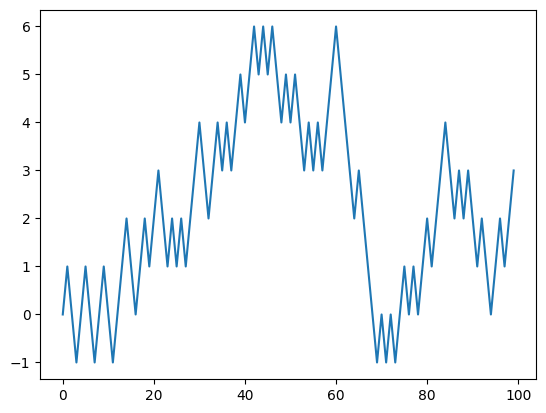

In [277]:
# plot our result of the first 100 steps
plt.plot(walk[:100])

In [280]:
# using  numpy arrays
nsteps = 1000

draws = np.random.randint(0, 2, size=1000)
steps = np.where(draws > 0, 1, -1)

walk = steps.cumsum()

In [282]:
walk.min()

-55

In [284]:
walk.max()

25

In [285]:
walk.mean()

-16.3

In [286]:
walk.std()

23.78205205611997

In [307]:
nwalks = 5000
nsteps = 1000

# simulating 5000 different random walks, each having 1000 steps
draws = np.random.randint(0, 2, size=(nwalks, nsteps))

# 
steps = np.where(draws > 0, 1, -1)

# sum all the steps along the columns ==> each of the 5000 different walks, we sum the steps.
walks = steps.cumsum(1)

In [326]:
hits30 = (np.abs(walks) >= 30).any(1)
hits30.sum()

3352

In [327]:
x = ((np.abs(walks[hits30]) >= 30)).argmax(1)
x

array([481, 957, 557, ..., 225, 543, 833])